### Abstract:

In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."



![The Movie Box Office official page](https://github.com/pa-shri/INFO7390_ADS/blob/master/Data_TMDB%20Box%20Office%20Prediction/TMDB%20image.png?raw=true)



This competition, presents with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

https://www.kaggle.com/c/tmdb-box-office-prediction/data



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
import ast 
from collections import Counter

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-box-office-prediction/sample_submission.csv
/kaggle/input/tmdb-box-office-prediction/test.csv
/kaggle/input/tmdb-box-office-prediction/train.csv


In [ ]:
#import data
train_data = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/test.csv')

train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
#size of train and test set
print('size of train data: {}'.format(train_data.shape))
print('size of test data: {}'.format(test_data.shape))

size of train data: (3000, 23)
size of test data: (4398, 22)


### Dealing with json data

In [ ]:
#Creating a list of json columns:

json_cols = ['belongs_to_collection','genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in json_cols:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train_data = text_to_dict(train_data)
test_data = text_to_dict(test_data)

train_data[json_cols].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,{},"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,{},"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",{},"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,{},"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


#### belongs_to_collection

In [ ]:
#lets take a look at json data column belongs_to_collection
for i, e in enumerate(train_data['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


In [ ]:
#a look at number of null and not null columns
train_data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [ ]:
#Creating 2 new columns collection_name and has_collection with binary values.
train_data['collection_name'] = train_data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train_data['has_collection'] = train_data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test_data['collection_name'] = test_data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test_data['has_collection'] = test_data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

train_data = train_data.drop(['belongs_to_collection'], axis=1)
test_data = test_data.drop(['belongs_to_collection'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 24), (4398, 23))

#### Genre

In [ ]:
#Genre:
for i, e in enumerate(train_data['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [ ]:
#Checking number of genres
print('Number of genres in films')
train_data['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [ ]:

list_of_genres = list(train_data['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [ ]:
#Creating columns for top 15 genres:
train_data['num_genres'] = train_data['genres'].apply(lambda x: len(x) if x != {} else 0)
train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train_data['genre_' + g] = train_data['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test_data['num_genres'] = test_data['genres'].apply(lambda x: len(x) if x != {} else 0)
test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test_data['genre_' + g] = test_data['all_genres'].apply(lambda x: 1 if g in x else 0)

train_data = train_data.drop(['genres'], axis=1)
test_data = test_data.drop(['genres'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 40), (4398, 39))

#### Production Companies

In [ ]:
#Companies:
for i, e in enumerate(train_data['production_companies'][:10]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}
5 {}
6 [{'name': 'Ghost House Pictures', 'id': 768}, {'name': 'North Box Productions', 'id': 22637}]
7 {}
8 [{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Jim Henson Productions', 'id': 2504}, {'name': 'Jim Henson Company, The', 'id': 6254}]
9 [{'name': 'Castle Rock Entertainment', 'id': 97}]


In [ ]:
print('Number of production companies in films')
train_data['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies in films


1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [ ]:
#Since most of the films have min 10 companies. We will keep top 10 production companies.
train_data[train_data['production_companies'].apply(lambda x: len(x) if x != {} else 0) > 11]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music
31,32,0,http://www.cache-derfilm.at,tt0387898,fr,Caché,A married couple is terrorized by a series of ...,5.695860,/i1Zl8S4DgM3IDLW5dhZzBnIdCOe.jpg,"[{'name': 'Les Films du Losange', 'id': 223}, ...","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...",5/2/05,117.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Caché,"[{'id': 90, 'name': 'paris'}, {'id': 213, 'nam...","[{'cast_id': 2, 'character': 'Georges Laurent'...","[{'credit_id': '52fe4244c3a36847f8011073', 'de...",36000000,0,0,3,Drama Mystery Thriller,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
116,117,0,NaN,tt2113822,zh,一九四二,"In 1942, Henan Province was devastated by the ...",1.678013,/xxz2gi8vijqqJySGO3kQy2i8mv.jpg,"[{'name': 'Emperor Motion Pictures', 'id': 272...","[{'iso_3166_1': 'CN', 'name': 'China'}]",11/1/12,145.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Back to 1942,"[{'id': 478, 'name': 'china'}, {'id': 180999, ...","[{'cast_id': 3, 'character': 'Theodore Harold ...","[{'credit_id': '5761375dc3a36808aa001554', 'de...",311,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,364,15400000,NaN,tt2053425,fr,De rouille et d'os,"Put in charge of his young son, Ali leaves Bel...",8.400049,/cHCwW8xPl8yPKQwpNzKVinwvirT.jpg,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",5/17/12,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Rust and Bone,"[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 2, 'character': 'St√©phanie', 'cr...","[{'credit_id': '52fe49dd9251416c750d5e05', 'de...",25762027,0,0,2,Drama Romance,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
392,393,0,NaN,tt5072406,fr,Moka,Diane Kramer is led by one obsession: to find ...,2.404466,/5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Cin...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/17/16,89.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Moka,{},"[{'cast_id': 1, 'character': 'Diane', 'credit_...","[{'credit_id': '59619ddd9251410bfa0cf8e5', 'de...",126463,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
449,450,80000000,http://asoundofthunder.warnerbros.com/,tt0318081,en,A Sound of Thunder,When a hunter sent back to the prehistoric era...,4.980191,/gsqOX1ReJ5lcmTuDdkhOXLug8Ug.jpg,"[{'name': 'Epsilon Motion Pictures', 'id': 117...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",5/15/05,110.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Some Rules Should Never Be Broken.,A Sound of Thunder,"[{'id': 3737, 'name': 'dying and death'}, {'id...","[{'cast_id': 34, 'character': 'Alicia Wallenbe...","[{'credit_id': '52fe431e9251416c7500438b', 'de...",5989640,0,0,4,Action Adventure Science Fiction Thriller,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0
554,555,14500000,NaN,tt0293416,ja,Metropolis,Duke Red has overseen the construction of a ma...,9.298092,/1EK7mGCpRKYmSg25FaojvnS9opm.jpg,"[{'name': 'Bandai Visual Company', 'id': 528},...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",5/26/01,108.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,Welcome to Metropolis,Metropolis,"[{'id': 931, 'name': 'jealousy'}, {'id': 1761,...","[{'cast_id': 1, 'character': 'Tima (voice)', '...","[{'credit_id': '52fe4510c3a36847f80ba41d', 'de...",95789342,0,0,2,Animation Science Fiction,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1079,1080,7000000,NaN,tt2737050,fr,"Deux jours, une nuit",Sandra is a young woman who has only one weeke...,6.868022,/1mYAejpMskvskGr0J0SaBvdjmrH.jpg,"[{'name': 'BIM Distribuzione', 'id': 225}, {'n...","[{'iso_

In [ ]:
list_of_companies = list(train_data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [ ]:
#creating binary columns for top 10 companies:

train_data['num_companies'] = train_data['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train_data['all_production_companies'] = train_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(10)]
for g in top_companies:
    train_data['production_company_' + g] = train_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test_data['num_companies'] = test_data['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test_data['all_production_companies'] = test_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test_data['production_company_' + g] = test_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train_data = train_data.drop(['production_companies', 'all_production_companies'], axis=1)
test_data = test_data.drop(['production_companies', 'all_production_companies'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 50), (4398, 49))

#### Production Countries

In [ ]:
for i, e in enumerate(train_data['production_countries'][:20]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
5 {}
6 [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]
7 {}
8 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
9 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
10 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
11 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
12 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
13 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
14 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
15 [{'iso_3166_1': 'RS', 'name': 'Serbia'}]
16 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
17 [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
18 [{'iso_3166_1': 'AT', '

In [ ]:
#There are few cases where companies from more than one country worked together:
list_of_countries = list(train_data['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(10)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58)]

In [ ]:
#There are few cases where companies from more than one country worked together. SO, creating binary column for each company
train_data['num_countries'] = train_data['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train_data['all_countries'] = train_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train_data['production_country_' + g] = train_data['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test_data['num_countries'] = test_data['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test_data['all_countries'] = test_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test_data['production_country_' + g] = test_data['all_countries'].apply(lambda x: 1 if g in x else 0)

train_data = train_data.drop(['production_countries', 'all_countries'], axis=1)
test_data = test_data.drop(['production_countries', 'all_countries'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 75), (4398, 74))

### Spoken Language:

In [ ]:
for i, e in enumerate(train_data['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [ ]:
print('Number of spoken languages in films')
train_data['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [ ]:
list_of_languages = list(train_data['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [ ]:
#Creating binary columns for top 30 languages:
train_data['num_languages'] = train_data['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train_data['all_languages'] = train_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train_data['language_' + g] = train_data['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test_data['num_languages'] = test_data['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test_data['all_languages'] = test_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test_data['language_' + g] = test_data['all_languages'].apply(lambda x: 1 if g in x else 0)

train_data = train_data.drop(['spoken_languages', 'all_languages'], axis=1)
test_data = test_data.drop(['spoken_languages', 'all_languages'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 105), (4398, 104))

### Cast

In [ ]:
for i, e in enumerate(train_data['cast'][:1]):
    print(i, e)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [ ]:
print('Number of casted persons in films')
train_data['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


15    212
16    165
10    135
13    129
12    124
11    122
9     118
17    118
18    115
14    110
Name: cast, dtype: int64

In [ ]:
#list of names of cast
list_of_cast_names = list(train_data['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(10)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23)]

In [ ]:
#0 is unspecified, 1 is female, and 2 is male
list_of_cast_genders = list(train_data['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27949), (0, 20329), (1, 13533)]

In [ ]:
#which charactes are mostly casted. It can be seen that most people have played their own role.
list_of_cast_characters = list(train_data['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44)]

In [ ]:
train_data['num_cast'] = train_data['cast'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(10)]
for g in top_cast_names:
    train_data['cast_name_' + g] = train_data['cast'].apply(lambda x: 1 if g in str(x) else 0)
train_data['genders_0_cast'] = train_data['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train_data['genders_1_cast'] = train_data['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train_data['genders_2_cast'] = train_data['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(10)]
for g in top_cast_characters:
    train_data['cast_character_' + g] = train_data['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
test_data['num_cast'] = test_data['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test_data['cast_name_' + g] = test_data['cast'].apply(lambda x: 1 if g in str(x) else 0)
test_data['genders_0_cast'] = test_data['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test_data['genders_1_cast'] = test_data['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test_data['genders_2_cast'] = test_data['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test_data['cast_character_' + g] = test_data['cast'].apply(lambda x: 1 if g in str(x) else 0)

train_data = train_data.drop(['cast'], axis=1)
test_data = test_data.drop(['cast'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 128), (4398, 127))

### Crew

In [ ]:
for i, e in enumerate(train_data['crew'][:1]):
    print(i, e[:10])

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [ ]:
print('Number of casted persons in films')
train_data['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


2     179
11    127
10    126
3     126
12    110
9     109
8     109
14    104
4     101
7      94
Name: crew, dtype: int64

In [ ]:
list_of_crew_names = list(train_data['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(10)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35)]

In [ ]:
list_of_crew_jobs = list(train_data['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_jobs for i in j]).most_common(10)

[('Producer', 6011),
 ('Executive Producer', 3459),
 ('Director', 3225),
 ('Screenplay', 2996),
 ('Editor', 2824),
 ('Casting', 2483),
 ('Director of Photography', 2288),
 ('Original Music Composer', 1947),
 ('Art Direction', 1821),
 ('Production Design', 1650)]

In [ ]:
list_of_crew_genders = list(train_data['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(10)

[(0, 41787), (2, 24898), (1, 6412)]

In [ ]:
list_of_crew_departments = list(train_data['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(10)

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591)]

In [ ]:
#Creating columns for top 10 crew members.
train_data['num_crew'] = train_data['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(10)]
for g in top_crew_names:
    train_data['crew_name_' + g] = train_data['crew'].apply(lambda x: 1 if g in str(x) else 0)
train_data['genders_0_crew'] = train_data['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train_data['genders_1_crew'] = train_data['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train_data['genders_2_crew'] = train_data['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(10)]
for j in top_crew_jobs:
    train_data['jobs_' + j] = train_data['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(10)]
for j in top_crew_departments:
    train_data['departments_' + j] = train_data['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
    
test_data['num_crew'] = test_data['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test_data['crew_name_' + g] = test_data['crew'].apply(lambda x: 1 if g in str(x) else 0)
test_data['genders_0_crew'] = test_data['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test_data['genders_1_crew'] = test_data['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test_data['genders_2_crew'] = test_data['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test_data['jobs_' + j] = test_data['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test_data['departments_' + j] = test_data['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train_data = train_data.drop(['crew'], axis=1)
test_data = test_data.drop(['crew'], axis=1)

In [ ]:
train_data.shape,test_data.shape

((3000, 161), (4398, 160))

In [ ]:
train_data.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,6,8,10,1,1,1,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,9,10,12,4,2,13,8,4,2,4
1,2,40000000,NaN,tt0368933,en,The Princ

In [ ]:
test_data.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects
0,3001,0,http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,7/14/07,90.0,Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...",Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,4,3,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,3002,8

In [ ]:
#train_data.columns
pd.set_option('display.max_columns', None)
train_data.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,6,8,10,1,1,1,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,9,10,12,4,2,13,8,4,2,4
1,2,40000000,NaN,tt0368933,en,The Princ

In [ ]:
#creating a copy of test and train data:
train_data_backup = train_data.copy()
test_data_backup = test_data.copy()

In [ ]:
#listing Numerical values:
features_numerical = [features for features in train_data.columns if train_data[features].dtype!='O']
print(train_data[features_numerical].shape)
train_data[features_numerical].head()

(3000, 148)


,id,budget,popularity,runtime,revenue,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects
0,1,14000000,6.575393,93.0,12314651,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,6,8,10,1,1,1,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,9,10,12,4,2,13,8,4,2,4
1,2,40000000,8.248895,113.0,95149435,1,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,10,10,1,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,1,4,4,3,1,1,1,1,0,1,1,0,0,4,1,0,0,1,0,1,1,1,0
2,3,3300000,64.299990,105.0,13092000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,

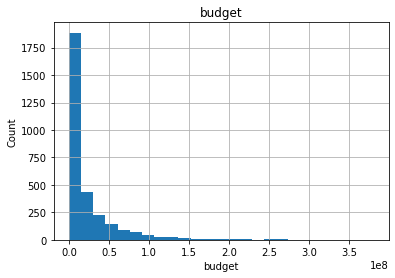

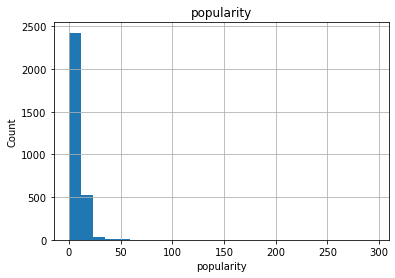

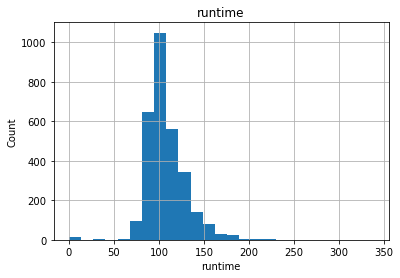

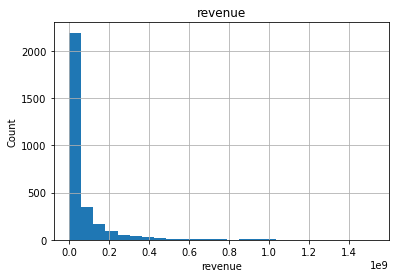

In [ ]:
#listing continuous numerical features:
continuous_feature=['budget','popularity','runtime','revenue']

#plotting their histograms:
for features in continuous_feature:
    data=train_data.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()


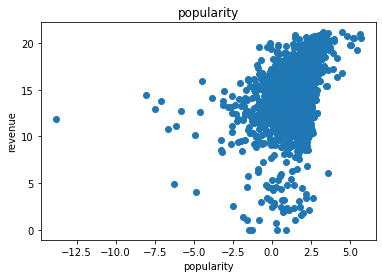

In [ ]:
#As we can see, the data is pretty skewed. So, we will scale it using logarithmic transformations:
data=train_data.copy()
for features in continuous_feature:
    if 0 in data[features].unique():
        pass
    else:
        data[features]=np.log(data[features])
        data['revenue']=np.log(data['revenue'])
        plt.scatter(data[features],data['revenue'])
        plt.xlabel(features)
        plt.ylabel('revenue')
        plt.title(features)
        plt.show()

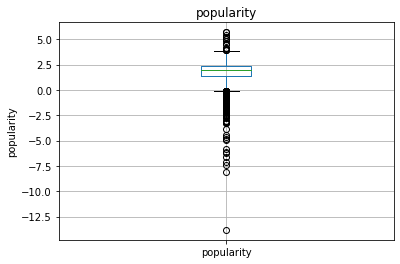

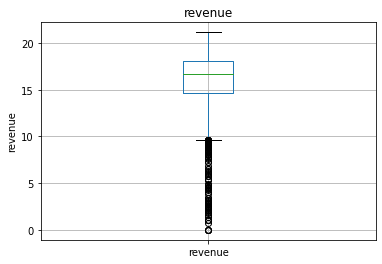

In [ ]:
#Lets plot outliers:

for feature in continuous_feature:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
#Dealing with categorical features:
categorical_features=[feature for feature in train_data.columns if data[feature].dtypes=='O']
categorical_features

['homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'poster_path',
 'release_date',
 'status',
 'tagline',
 'title',
 'Keywords',
 'collection_name',
 'all_genres']

In [ ]:
#Check for missing values in categorical features:
features_null = [features for features in train_data.columns if train_data[features].isnull().sum()>1 and train_data[features].dtypes =='O']
print(train_data[features_null].shape)
train_data[features_null].head()

(3000, 3)


,homepage,overview,tagline
0,NaN,"When Lou, who has become the ""father of the In...",The Laws of Space and Time are About to be Vio...
1,NaN,Mia Thermopolis is now a college graduate and ...,It can take a lifetime to find true love; she'...
2,http://sonyclassics.com/whiplash/,"Under the direction of a ruthless instructor, ...",The road to greatness can take you to the edge.
3,http://kahaanithefilm.com/,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,NaN
4,NaN,Marine Boy is the story of a former national s...,NaN


In [ ]:
#Replacing nan in categorical data with string 'Unknown':
def replace_cat_features(train_data, features_null):
  data = train_data.copy()
  data[features_null] = data[features_null].fillna('Unknown')
  return data

train_data = replace_cat_features(train_data, features_null)

train_data[features_null].head()

,homepage,overview,tagline
0,Unknown,"When Lou, who has become the ""father of the In...",The Laws of Space and Time are About to be Vio...
1,Unknown,Mia Thermopolis is now a college graduate and ...,It can take a lifetime to find true love; she'...
2,http://sonyclassics.com/whiplash/,"Under the direction of a ruthless instructor, ...",The road to greatness can take you to the edge.
3,http://kahaanithefilm.com/,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Unknown
4,Unknown,Marine Boy is the story of a former national s...,Unknown


In [ ]:
#Replacing nan in categorical data with string 'Unknown' for test data:
def replace_cat_features(test_data, features_null):
  data = test_data.copy()
  data[features_null] = data[features_null].fillna('Unknown')
  return data

test_data = replace_cat_features(test_data, features_null)

test_data[features_null].head()

,homepage,overview,tagline
0,http://www.pokemon.com/us/movies/movie-pokemon...,Ash and friends (this time accompanied by newc...,Somewhere Between Time & Space... A Legend Is ...
1,Unknown,When an abused wife grows to giant size becaus...,A titanic beauty spreads a macabre wave of hor...
2,Unknown,Good-natured astronomer Sam is devastated when...,A Comedy About Lost Loves And Last Laughs
3,http://www.sonyclassics.com/incendies/,A mother's last wishes send twins Jeanne and S...,The search began at the opening of their mothe...
4,Unknown,"In 1972, a seemingly typical shoestring budget...",It was filmed in 6 days for 25 thousand dollar...


In [ ]:
train_data.shape,test_data.shape

((3000, 161), (4398, 160))

In [ ]:
#Checking for missing values in numerical features
features_num_null = [features for features in train_data.columns if train_data[features].isnull().sum()>1 and train_data[features].dtypes !='O']
print(train_data[features_num_null].isnull().sum())
train_data[features_num_null].head()

runtime    2
dtype: int64


,runtime
0,93.0
1,113.0
2,105.0
3,122.0
4,118.0


In [ ]:
#i will be replacing missing values with median:

Median = train_data['runtime'].median()
train_data['runtime'].fillna(Median, inplace=True)

train_data[features_num_null].isnull().sum()

runtime    0
dtype: int64

### Feature Scaling

In [ ]:
features_scale = [features for features in train_data.columns if features not in categorical_features+ ['id','revenue']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data[features_scale])

MinMaxScaler()

In [ ]:
scaler.fit(test_data[features_scale])

MinMaxScaler()

In [ ]:
data_train = pd.concat([train_data[['id','revenue']].reset_index(drop=True),pd.DataFrame(scaler.transform(train_data[features_scale]),columns=features_scale)],axis=1)
data_test = pd.concat([test_data[['id']].reset_index(drop=True),pd.DataFrame(scaler.transform(test_data[features_scale]),columns=features_scale)],axis=1)

In [ ]:
train_data=data_train
test_data = data_test

In [ ]:
train_data.shape,test_data.shape

((3000, 148), (3000, 147))

In [ ]:
## Capture the dependent feature
y_train=train_data[['revenue']]

In [ ]:
X_train=train_data.drop(['id','revenue'],axis=1)

In [ ]:
#Splitting data in test and val set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=10)

In [ ]:
X_train.shape, X_test.shape

((2400, 146), (600, 146))

In [ ]:

import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 12.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=0, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

[03:39:35] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[03:39:35] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:39:35] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=0, nthread=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#X_test.drop(labels = ['revenue'])
y_pred=regressor.predict(X_test)

In [ ]:
y_pred=regressor.predict(test_data)

In [ ]:
#y=np.expm1(model.predict(test))
test_data['revenue']=y_pred
test_data[['id','revenue']].to_csv('submission.csv',index=False)

![Kaggle Score](https://github.com/pa-shri/INFO7390_ADS/blob/master/Data_TMDB%20Box%20Office%20Prediction/Screen%20Shot%202020-10-12%20at%207.20.44%20PM.png?raw=true)

Competition score using 50 point metric: 41.66

### **Conclusion**:

This competition provides a great opportunity to work on extensive data preprocessing and feature engineering. 
Through this competition I got introduced json data format and learned how to work with it. 


### **Contributions statement**:
Analysis of revenue and it prediction using xgboost and data cleaning. Calculated the RMSLE score using sklearn to analyse the accuracy of prediction.





### **Citations**:

https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation



### **License**:

MIT License

Copyright (c) [2020] [Shruti Patil]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.






